# IST 707 HW4 Abhiraj Singh (asingh73)

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import keras
import time
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as gbm
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import tree

# Load Dataset

In [2]:
train_data = pd.read_csv('Disease Prediction Training.csv')
test_data = pd.read_csv('Disease Prediction Testing.csv')
train_data.head(5)

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0
3,50,male,172,110.0,130,80,normal,normal,1,0,1,0
4,39,female,162,61.0,110,80,high,high,0,0,1,0


In [ ]:
train_data.dtypes

Age                      int64
Gender                  object
Height                   int64
Weight                 float64
High Blood Pressure      int64
Low Blood Pressure       int64
Cholesterol             object
Glucose                 object
Smoke                    int64
Alcohol                  int64
Exercise                 int64
Disease                  int64
dtype: object

In [ ]:
train_data.isna().sum()

Age                    0
Gender                 0
Height                 0
Weight                 0
High Blood Pressure    0
Low Blood Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
Disease                0
dtype: int64

In [3]:
#This will help us get familliar with the train dataset's statistical features
print("The shape of the train dataframe is:",train_data.shape)

#check whether data is balanced or unbalance

print("Total number of 1's in the dataframe",len(train_data[train_data.Disease == 1]))
print("Total number of 0's in the dataframe",len(train_data[train_data.Disease == 0]))

train_data.describe().transpose()

The shape of the train dataframe is: (49000, 12)
Total number of 1's in the dataframe 24498
Total number of 0's in the dataframe 24502


,count,mean,std,min,25%,50%,75%,max
Age,49000.0,52.853306,6.763065,29.0,48.0,53.0,58.0,64.0
Height,49000.0,164.366878,8.216637,55.0,159.0,165.0,170.0,207.0
Weight,49000.0,74.190527,14.329934,10.0,65.0,72.0,82.0,200.0
High Blood Pressure,49000.0,128.698939,147.624582,-150.0,120.0,120.0,140.0,14020.0
Low Blood Pressure,49000.0,96.917367,200.368069,0.0,80.0,80.0,90.0,11000.0
Smoke,49000.0,0.088265,0.283683,0.0,0.0,0.0,0.0,1.0
Alcohol,49000.0,0.054245,0.226503,0.0,0.0,0.0,0.0,1.0
Exercise,49000.0,0.803204,0.397581,0.0,1.0,1.0,1.0,1.0
Disease,49000.0,0.499959,0.500005,0.0,0.0,0.0,1.0,1.0


# Data Visualization

Based on the below plots we can see that the numerical countinuous variables have many outliers.

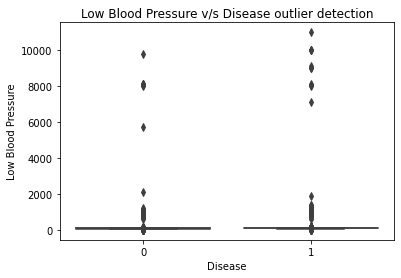

In [ ]:
# Data Visualization to assess the outlier in the dataset

sns.boxplot(y=train_data["Low Blood Pressure"], x=train_data["Disease"]).set_title("Low Blood Pressure v/s Disease outlier detection")
plt.show()

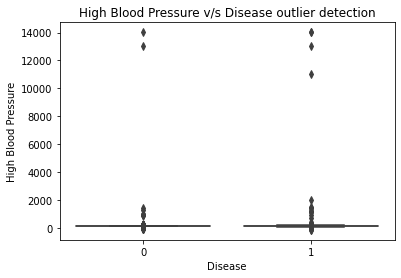

In [ ]:
# Data Visualization to assess the outlier in the dataset

sns.boxplot(y=train_data["High Blood Pressure"], x=train_data["Disease"]).set_title("High Blood Pressure v/s Disease outlier detection")
plt.show()

# Data Pre-processing

The above outliers are being treated by using the winsorization methods. Winsorizing or winsorization is the transformation of statistics which limits extreme values in the statistical data to reduce the effect of possibly spurious outliers. The below cell depicts the implementation.

In [4]:
#Curing the outliers by winsorizing 

winsorize(train_data['High Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)
winsorize(train_data['Low Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)

winsorize(test_data['High Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)
winsorize(test_data['Low Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)

masked_array(data=[80, 70, 80, ..., 90, 90, 80],
             mask=False,
       fill_value=999999)

To make the data usable for the machine learning algorithms we need to apply we need to convert the categoriacal variable to the numerical values using the one hot encoding. For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

# One Hot Encoding

In [5]:
#One-hot encoding
cols = ['Gender','Cholesterol','Glucose']
train_data = pd.get_dummies(train_data, columns=cols)

#perform same for the test data
cols = ['Gender','Cholesterol','Glucose']
test_data = pd.get_dummies(test_data, columns=cols)

# Data Scaling and splitting of dataset

Feature scaling is essential for machine learning algorithms that calculate distances between data. Therefore, we need to have standardized data. The below cell shows the scaling/standardization.

We perform train-test split in this section. We need training set to allow the machine learning learn patterns or gain information. Then test data is helpful to know how well our model performs on the unseen dataset. This allows us to see how well the model is able to generalize. This is a crucial step to determine the performance of the model

In [6]:
x = train_data.drop(columns=['Disease'])
y = train_data['Disease']

ID=test_data["ID"]
x_test=test_data.drop(columns=['ID'])


In [7]:
#generating the bins
labels = [1,2,3,4,5]
x['Age']=pd.qcut(x['Age'],5,labels=labels)
x_test['Age']=pd.qcut(x_test['Age'],5,labels=labels)

x['Height']=pd.qcut(x['Height'],5,labels=labels)
x_test['Height']=pd.qcut(x_test['Height'],5,labels=labels)

x['Weight']=pd.qcut(x['Weight'],5,labels=labels)
x_test['Weight']=pd.qcut(x_test['Weight'],5,labels=labels)

In [8]:
#scaling the data using the minmax scaler
scaler = MinMaxScaler()
scaler.fit(x)
train_std = scaler.transform(x)

scaler.fit(x_test)
test_std = scaler.transform(x_test)

In [9]:
#splitting the data into train and validation for non-standarized dataset

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=6)

#splitting the data into train and validation for standarized dataset

x_train_std, x_val_std, y_train_std, y_val_std = train_test_split(train_std, y, test_size=0.25, random_state=6)

# ML Models

# Logistic Regression

In [ ]:
# base model
lr = LogisticRegression()
lr.fit(x_train_std, y_train)
pred = lr.predict(x_val_std)

In [ ]:
cfm = confusion_matrix(y_val, pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(pred, y_val))
print(classification_report(pred, y_val))

[[4797 1378]
 [1940 4135]]
The accuracy of the model is:  0.7291428571428571
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      6737
           1       0.68      0.75      0.71      5513

    accuracy                           0.73     12250
   macro avg       0.73      0.73      0.73     12250
weighted avg       0.73      0.73      0.73     12250



In [ ]:
lr_base_pred = lr.predict(x_val_std)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, lr_base_pred)*100, 2)}%")

Accuracy: 72.91%


In [ ]:
#We can tune using the GridSearchCV
lr_grid = LogisticRegression()
tuned_parameters = [{'penalty': ['l1','l2','elasticnet'],
                     'C':np.logspace(-3,3,7)}]

lr_grid_search = GridSearchCV(estimator = lr_grid, param_grid = tuned_parameters, cv = 3, n_jobs = -1, verbose = 2)

lr_grid_search.fit(x_train_std,y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
lr_grid_search.best_params_

{'C': 100.0, 'penalty': 'l2'}

# Logistic Regression Best Model

Parameters tuned: 

1) C is the inverse of regularization strength. Like in support vector machines, smaller values specify stronger regularization.

2) penalty are {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
Used to specify the norm used in the penalization. They are used for regularization and help the machine learning model to reduce the overfitting.

In [10]:
# best model
lr_best = LogisticRegression(penalty='l2',C=100)
lr_best.fit(x_train_std, y_train)
pred = lr_best.predict(x_val_std)

In [11]:
cfm = confusion_matrix(y_val, pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(pred, y_val))
print(classification_report(pred, y_val))

[[4801 1374]
 [1942 4133]]
The accuracy of the model is:  0.7293061224489796
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      6743
           1       0.68      0.75      0.71      5507

    accuracy                           0.73     12250
   macro avg       0.73      0.73      0.73     12250
weighted avg       0.73      0.73      0.73     12250



In [12]:
lr_best_pred = lr_best.predict(x_val_std)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, lr_best_pred)*100, 2)}%")

Accuracy: 72.93%


The below cell shows the ROC AUC curve for the above machine learning model

ROC AUC=0.789


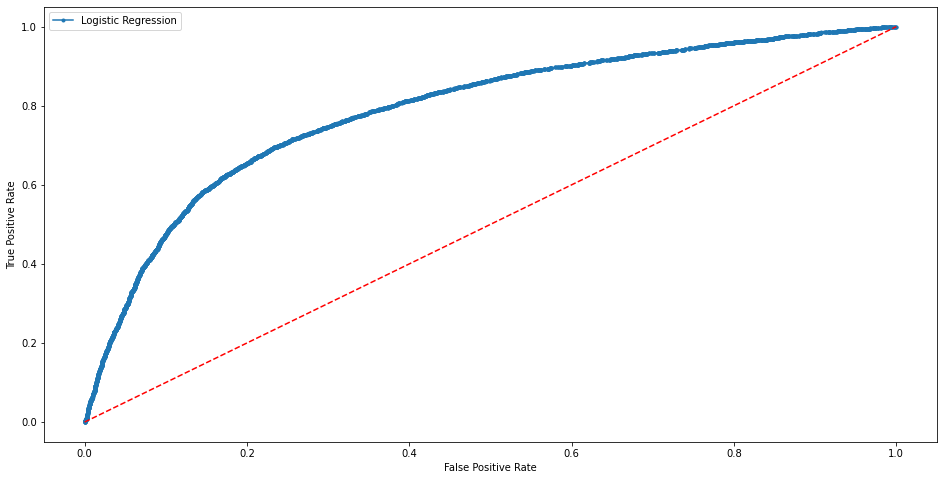

In [ ]:
#AUC ROC curve
prob = lr_best.predict_proba(x_val_std)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Linear SVM

Parameter Tuned:

1) C is the inverse of regularization strength. The smaller values specify stronger regularization.

2) penalty are {‘l1’, ‘l2’, ‘elasticnet’, ‘none’} Used to specify the norm used in the penalization. They are used for regularization and help the machine learning model to reduce the overfitting.

In [ ]:
#Best Linear Support Vector Classifier

lin_clf = svm.LinearSVC()

param_grid = {'C':[0.25,0.5,0.75,1],'penalty':['l2']}

svm_grid_search = GridSearchCV(lin_clf,param_grid,cv=3, n_jobs=-1, verbose=2)
svm_grid_search.fit(x_train_std,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(svm_grid_search.best_params_)  #getting the best parameters

{'C': 0.25, 'penalty': 'l2'}


In [13]:
#Linear SVC best model
lin_clf_best = svm.LinearSVC(C=0.25,penalty='l2')
lin_clf_best = lin_clf_best.fit(x_train_std,y_train)

y_pred = lin_clf_best.predict(x_val_std)
print(f"Accuracy: {round(metrics.accuracy_score(y_val_std, y_pred)*100, 2)}%")

Accuracy: 72.96%


In [ ]:
#confusion matrix to see evaluation metrics
cfm = confusion_matrix(y_val_std, y_pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(y_pred, y_val_std))
print(classification_report(y_pred, y_val_std))

[[4844 1331]
 [1981 4094]]
The accuracy of the model is:  0.7296326530612245
              precision    recall  f1-score   support

           0       0.78      0.71      0.75      6825
           1       0.67      0.75      0.71      5425

    accuracy                           0.73     12250
   macro avg       0.73      0.73      0.73     12250
weighted avg       0.74      0.73      0.73     12250



# Deep Learning Models Implementation

In [15]:
#create a timehistory class to get a time for building a network
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [16]:
x_train_std.shape[1]

16

Parameters that can be tuned in ANN0, ANN1, ANN2 are:

1)Neurons: We can tune the number of neurons based on the problem statement. 

2)Hidden Layers: We can change the number of layers in the neural network. This will increase the computation but there's a possibility that it can learn more hidden patterns in the data

3)loss function: This hyperparameter is one which the neural network tries to reduce and eventually reduce the error rate of the model

4)optimizer: The optimizer is responsible for achieving the local/global minima and helps in the overall performance of the neural networks 

5)metrics: This is the evaluation metric which we want to consider for the evaluation of the model. For example: accuracy

6)Activation function: The activation functions help the network use the important information and suppress the irrelevant data points. Example: sigmoid, relu, softmax etc 

# ANN0

Base Model

In [17]:
#create a single layer perceptron  network with sigmoid activation function ANN0
%%time

time_callback = TimeHistory()

model_slp = Sequential()
model_slp.add(Dense(1, input_dim = 16, activation = 'sigmoid'))
model_slp.compile(loss='mean_squared_error', optimizer='sgd', metrics='accuracy')

history = History()
model_slp.fit(x_train_std, y_train, epochs=50, verbose=0, callbacks=[history, time_callback],validation_data=(x_val_std,y_val))
print(model_slp.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 17        
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None
CPU times: user 55.2 s, sys: 6.29 s, total: 1min 1s
Wall time: 47.3 s


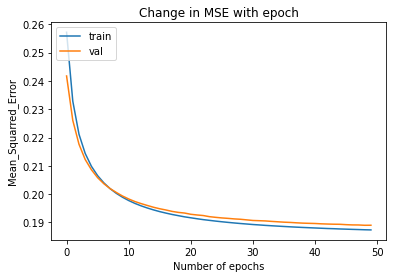

In [ ]:
#collect and plot mse of the training and the vaidation set

train_mse = history.history.get('loss')
val_mse = history.history.get('val_loss')
time_ann0 = list(time_callback.times)

#plot the Loss scores of the training set and the validation set with change in weight

plt.plot(train_mse)
plt.plot(val_mse)
plt.xlabel('Number of epochs')
plt.ylabel('Mean_Squarred_Error')
plt.title('Change in MSE with epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [ ]:
acc_score = history.history.get('accuracy')
print(acc_score[-1])

0.729469358921051


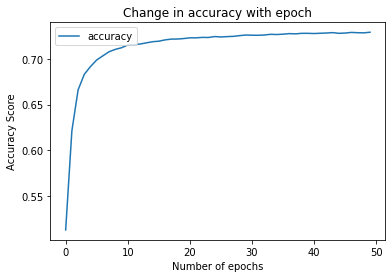

In [ ]:
#plot the accuracy per epoch of the single layer perceptron

#plot the Loss scores of the training set and the validation set with change in weight

plt.plot(acc_score)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy Score')
plt.title('Change in accuracy with epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()


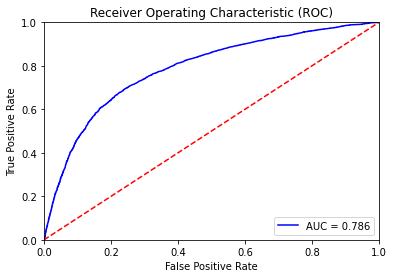

In [ ]:
#Print Area Under Curve

predictions_NN_prob = model_slp.predict(x_val_std)
predictions_NN_prob = predictions_NN_prob[:,0]

false_positive_rate, recall, thresholds = roc_curve(y_val, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The below cell shows the comparison of Logistic regression, Linear SVM and single layer perceptron.

In [ ]:

data_1 = [{'Model':['Logistic Regression'],
        'Parameters' :['C: 100.0, penalty: l2'],                               
        'Accuracy(%)':[72.93],
}
,
{'Model':['Linear SVM'],
        'Parameters' :['C: 0.25, penalty: l2'],                                          
        'Accuracy(%)':[72.96],
}
,
{'Model':['Single Layer Perceptron'],
        'Parameters' :['loss=mean_squared_error, optimizer=sgd, metrics=accuracy, epochs=50,activation = sigmoid'],                                          
        'Accuracy(%)':[72.95],
}

] 

data_1 = pd.DataFrame(data= data_1)
data_1

,Model,Parameters,Accuracy(%)
0,[Logistic Regression],"[C: 100.0, penalty: l2]",[72.93]
1,[Linear SVM],"[C: 0.25, penalty: l2]",[72.96]
2,[Single Layer Perceptron],"[loss=mean_squared_error, optimizer=sgd, metri...",[72.95]


Based on the above results we can clearly see that Logistic regression, linear SVM, Single Layer Perceptron perform very similar to each other.

The logistic regression comes from generalized linear regression. The Support Vector Machines algorithm is much more geometrically motivated. Instead of assuming a probabilistic model, we're trying to find a particular optimal separating hyperplane, where we define "optimality" in the context of the support vectors. A single layer perceptron (SLP) is a feed-forward network based on a threshold transfer function. SLP is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target (1 , 0). While a single layer perceptron can only learn linear functions, a multi layer perceptron can also learn non – linear functions



# ANN1 (Neural Network with one Hidden Layer)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


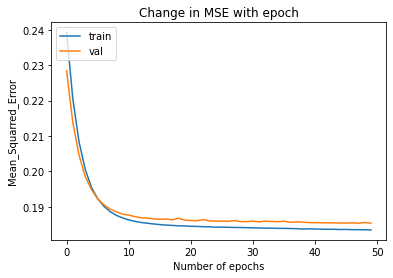

0.733251690864563


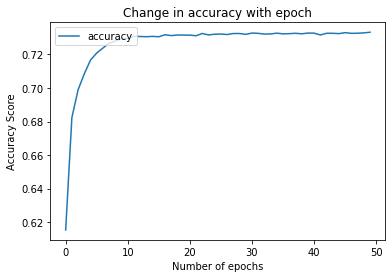

CPU times: user 58.4 s, sys: 5.71 s, total: 1min 4s
Wall time: 47.5 s


In [21]:
#create a multi-layer perceptron  network with sigmoid activation function ANN1 (d-d-1)
%%time

model_ann1 = Sequential()
model_ann1.add(Dense(16, input_dim = 16, activation = 'relu'))
model_ann1.add(Dense(1, activation = 'sigmoid'))

model_ann1.compile(loss='mean_squared_error', optimizer='sgd', metrics='accuracy')

history = History()
model_ann1.fit(x_train_std, y_train, epochs=50, verbose=0, callbacks=[history, time_callback],validation_data=(x_val_std,y_val))
print(model_ann1.summary())

#collect and plot mse of the training and the vaidation set

train_mse = history.history.get('loss')
val_mse = history.history.get('val_loss')
time_ann1 = list(time_callback.times)

#plot the Loss scores of the training set and the validation set with change in weight

plt.plot(train_mse)
plt.plot(val_mse)
plt.xlabel('Number of epochs')
plt.ylabel('Mean_Squarred_Error')
plt.title('Change in MSE with epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Determine the accuracy of the ANN1 model
acc_score = history.history.get('accuracy')
print(acc_score[-1])

#plot the accuracy per epoch of the multi-layer perceptron

#plot the Loss scores of the training set and the validation set with change in weight

plt.plot(acc_score)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy Score')
plt.title('Change in accuracy with epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()


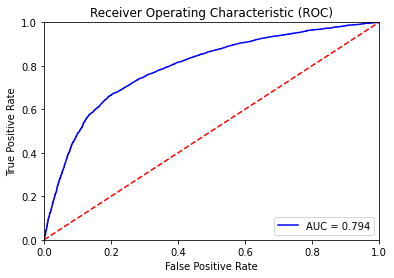

In [ ]:
#Print Area Under Curve

predictions_NN1_prob = model_ann1.predict(x_val_std)
predictions_NN1_prob = predictions_NN1_prob[:,0]

false_positive_rate, recall, thresholds = roc_curve(y_val, predictions_NN1_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ANN2 (Neural Network with two Hidden Layer)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
None


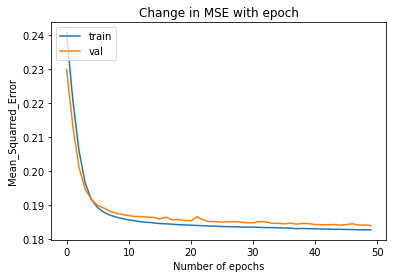

0.732952356338501


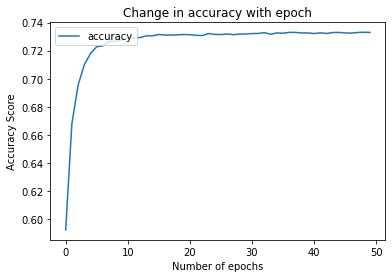

CPU times: user 1min, sys: 5.59 s, total: 1min 6s
Wall time: 48.8 s


In [22]:
#create a multi-layer perceptron  network with sigmoid activation function ANN1 
%%time

model_ann2 = Sequential()
model_ann2.add(Dense(16, input_dim = 16, activation = 'relu'))
model_ann2.add(Dense(16, activation = 'relu'))
model_ann2.add(Dense(1, activation = 'sigmoid'))

model_ann2.compile(loss='mean_squared_error', optimizer='sgd', metrics='accuracy')

history = History()
model_ann2.fit(x_train_std, y_train, epochs=50, verbose=0, callbacks=[history, time_callback],validation_data=(x_val_std,y_val))
print(model_ann2.summary())

#collect and plot mse of the training and the vaidation set

train_mse = history.history.get('loss')
val_mse = history.history.get('val_loss')
time_ann1 = list(time_callback.times)

#plot the Loss scores of the training set and the validation set with change in weight

plt.plot(train_mse)
plt.plot(val_mse)
plt.xlabel('Number of epochs')
plt.ylabel('Mean_Squarred_Error')
plt.title('Change in MSE with epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Determine the accuracy of the ANN1 model
acc_score = history.history.get('accuracy')
print(acc_score[-1])

#plot the accuracy per epoch of the multi-layer perceptron

#plot the Loss scores of the training set and the validation set with change in weight

plt.plot(acc_score)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy Score')
plt.title('Change in accuracy with epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()


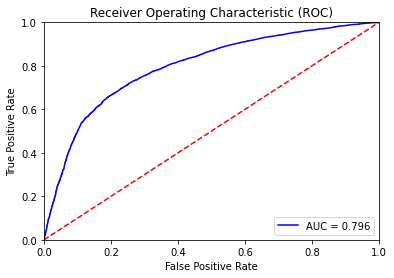

In [ ]:
#Print Area Under Curve

predictions_NN2_prob = model_ann2.predict(x_val_std)
predictions_NN2_prob = predictions_NN2_prob[:,0]

false_positive_rate, recall, thresholds = roc_curve(y_val, predictions_NN2_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

data_2 = [{'Model':['ANN0'],
       
        'Accuracy(%)':[72.94],
}
,
{'Model':['ANN1'],
                                   
        'Accuracy(%)':[73.31],
}
,
{'Model':['ANN2'],
                                                  
        'Accuracy(%)':[73.48],
}

] 

data_2 = pd.DataFrame(data= data_2)
data_2

,Model,Accuracy(%)
0,[ANN0],[72.94]
1,[ANN1],[73.31]
2,[ANN2],[73.48]


Based on the above accuracy scores we can see that the increase in layers of the neural network is beneficial for extracting relevant information and hidden patterns. This eventually increases the accuracy (evaluation metric). Therefore, now we shall try to optimize the ANN2 model by performing hyperparameter tuning for it. 

# ANN experimentation Model

In the below cell we will try to increase the neurons with 2 layers and check how does it help our evaluation metric. (Experimentation). Due to lack of computational resources of my laptop we could not perform extensive grid search hyperparameter tuning for ANN0, ANN1 and ANN2. Therefore, the below cell shows the experimentation on the ANN model that has been generated on seperately trained models. We get an accuracy of 73.36%. We have considered accuracy because the dataset is balanced.

In [ ]:
%%time

model_ann_best = Sequential()
model_ann_best.add(Dense(20, input_dim = 16, activation = 'relu'))
model_ann_best.add(Dense(32, activation = 'relu'))
model_ann_best.add(Dense(1, activation = 'sigmoid'))

model_ann_best.compile(loss='mean_squared_error', optimizer='sgd', metrics='accuracy')

history = History()
model_ann_best.fit(x_train_std, y_train, epochs=50, verbose=0, callbacks=[history, time_callback],validation_data=(x_val_std,y_val))
print(model_ann_best.summary())

#collect and plot mse of the training and the vaidation set

train_mse = history.history.get('loss')
val_mse = history.history.get('val_loss')
time_ann_best = list(time_callback.times)

#Determine the accuracy of the model
acc_score = history.history.get('accuracy')
print(acc_score[-1])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                340       
_________________________________________________________________
dense_24 (Dense)             (None, 32)                672       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 1,045
Trainable params: 1,045
Non-trainable params: 0
_________________________________________________________________
None
0.7336326241493225
CPU times: user 1min 4s, sys: 5.56 s, total: 1min 10s
Wall time: 51.8 s


# Ensemble learning 

# Decision Tree Implementation

Parameters Tuned:

1)min_samples_split: The minimum number of samples required to split an internal node

2)max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

3)min_samples_leaf: The minimum number of samples required to be at a leaf node

4)max_leaf_nodes: Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes are made. 

In [ ]:
clf = tree.DecisionTreeClassifier()

tuned_parameters = {
              'min_samples_split': [2, 10, 20, 25,30,35],
              'max_depth': [4, 5, 6, 10, 15, 20,30],
              'min_samples_leaf': [ 1, 2 , 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20,22,25]}
dt_grid_search = GridSearchCV(estimator = clf, param_grid = tuned_parameters, cv = 3, n_jobs = -1)

dt_grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 10, 15, 20, 30],
               

In [ ]:
dt_grid_search.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [23]:
clf = tree.DecisionTreeClassifier(max_depth= 10,max_leaf_nodes= 25,min_samples_leaf= 1,min_samples_split= 2)
clf = clf.fit(x_train, y_train)
pred = clf.predict(x_val)

In [ ]:
cfm = confusion_matrix(y_val, pred.round())
print(cfm)
print('The accuracy of the model is: ',accuracy_score(pred.round(), y_val))
print(classification_report(pred.round(), y_val))

[[4949 1226]
 [2079 3996]]
The accuracy of the model is:  0.730204081632653
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      7028
           1       0.66      0.77      0.71      5222

    accuracy                           0.73     12250
   macro avg       0.73      0.73      0.73     12250
weighted avg       0.74      0.73      0.73     12250



[[0.37881874 0.62118126]
 [0.13423742 0.86576258]
 [0.54528986 0.45471014]
 ...
 [0.79568106 0.20431894]
 [0.23382046 0.76617954]
 [0.18236551 0.81763449]]


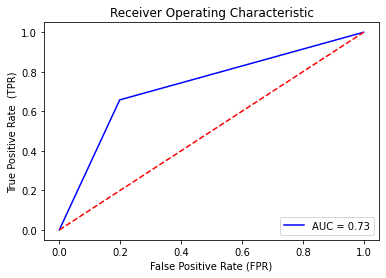

In [ ]:
#Roc curve
#source https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html 
probs = clf.predict_proba(x_val)
preds = probs[:,1]
print(probs)
preds
fpr, tpr, threshold = metrics.roc_curve(y_val, pred)

roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate  (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

## Random Forest: Grid Search Implementation

Parameters Tuned:

1) max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

2) min_samples_leaf: The minimum number of samples required to be at a leaf node.  

3) min_samples_split: The minimum number of samples required to split an internal node

4) n_estimators: The number of trees in the forest.

5) max_features: The number of features to consider when looking for the best split

In [ ]:
rf_grid = RandomForestClassifier()

grid_search = {'n_estimators':[50,100,150,200,250], 
              'max_features':[2,3,4,5,6],
              'min_samples_split': [5, 10],
              'max_depth': [ 15, 20,30],
              'min_samples_leaf': [ 5, 10]}

#use gridsearch to get the best paramenters
rf_grid = GridSearchCV(rf_grid, grid_search, cv=3,n_jobs=-1)

#fit model to data
rf_grid.fit(x_train, y_train)
rf_grid.best_params_

{'max_depth': 15,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 250}

In [24]:
rf_clf_best = RandomForestClassifier(n_estimators=250, max_features=5, max_depth=15, min_samples_leaf=10,min_samples_split=5,random_state=16)
rf_model=rf_clf_best.fit(x_train,y_train)
y_pred = rf_model.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, y_pred)*100, 2)}%")

Accuracy: 73.19%


In [ ]:
#confusion matrix to see evaluation metrics
cfm = confusion_matrix(y_val, y_pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(y_pred, y_val))
print(classification_report(y_pred, y_val))

[[4797 1378]
 [1906 4169]]
The accuracy of the model is:  0.7319183673469388
              precision    recall  f1-score   support

           0       0.78      0.72      0.74      6703
           1       0.69      0.75      0.72      5547

    accuracy                           0.73     12250
   macro avg       0.73      0.73      0.73     12250
weighted avg       0.74      0.73      0.73     12250



ROC AUC=0.798


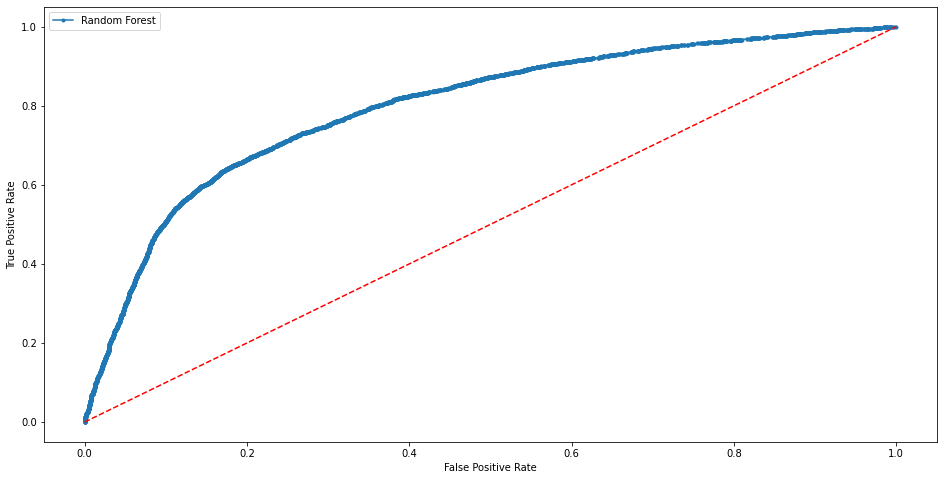

In [ ]:
#AUC ROC curve
prob = rf_clf_best.predict_proba(x_val)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The below table shows the best features i.e. the important features which were helpful to determine the tagerget variable.

In [ ]:
#Feature Importance using random forest

feature_imp = pd.DataFrame(rf_clf_best.feature_importances_, index=x_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
High Blood Pressure,0.455726
Low Blood Pressure,0.196348
Age,0.115219
Cholesterol_normal,0.050840
Weight,0.046181
Cholesterol_too high,0.039106
Height,0.032945
Exercise,0.013198
Cholesterol_high,0.010212
Glucose_normal,0.007371


## GBM Grid Search Implementaion

Parameters Tuned:

1) max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

2) min_samples_leaf: The minimum number of samples required to be at a leaf node.

3) min_samples_split: The minimum number of samples required to split an internal node

4) n_estimators: The number of trees in the forest.

5) learnin rate: the learning rate is a tuning parameter that determines the step size at each iteration while moving toward a minimum of a loss function.

In [ ]:
#Grid search implementation to get the best parameters
gbm_model = gbm()
grid_search = {'learning_rate': [0.02, 0.1, 0.001],
              'n_estimators': [50,100],
               'max_depth': [2,10,30],
             'min_samples_split': [5, 10],
               'min_samples_leaf': [5, 10]}
gbm_model = GridSearchCV(gbm_model, grid_search,n_jobs=-1)
gbm_model.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [ ]:
gbm_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [25]:
gbm_best_model = gbm(n_estimators=100, learning_rate=0.1,max_depth= 2, random_state=16,min_samples_leaf=5,min_samples_split=5)
gbm_best_model = gbm_best_model.fit(x_train,y_train)
y_pred = gbm_best_model.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, y_pred)*100, 2)}%")

Accuracy: 73.58%


ROC AUC=0.799


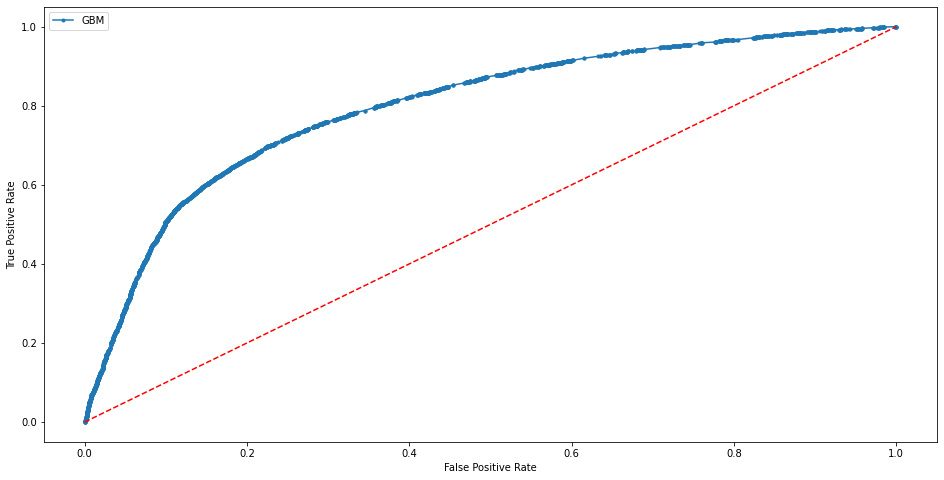

In [ ]:
prob = gbm_best_model.predict_proba(x_val)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='GBM')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The below table shows the most important features for determining the target variable

In [ ]:
#Feature Importance

feature_imp = pd.DataFrame(gbm_best_model.feature_importances_, index=x_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
High Blood Pressure,0.766966
Age,0.106139
Cholesterol_too high,0.049619
Low Blood Pressure,0.028385
Cholesterol_normal,0.024515
Weight,0.012948
Exercise,0.004304
Height,0.001553
Smoke,0.001443
Glucose_too high,0.001347


# Final Model Comparisons

In [26]:

data_final_comparison = [{'Model':['Logistic Regression'],
        'Parameters' :['C: 100.0, penalty: l2'],                               
        'Accuracy(%)':[72.93],
}
,
{'Model':['Linear SVM'],
        'Parameters' :['C: 0.25, penalty: l2'],                                          
        'Accuracy(%)':[72.96],
}
,
{'Model':['Single Layer Perceptron (ANN0)'],
        'Parameters' :['loss=mean_squared_error, optimizer=sgd, metrics=accuracy, epochs=50,activation = sigmoid'],                                          
        'Accuracy(%)':[72.94],
}
,
{'Model':['ANN1'],
        'Parameters' :['loss=mean_squared_error, optimizer=sgd, metrics=accuracy, epochs=50,activation = sigmoid'],                                          
        'Accuracy(%)':[73.31],
}
,
{'Model':['ANN2'],
        'Parameters' :['loss=mean_squared_error, optimizer=sgd, metrics=accuracy, epochs=50,activation = sigmoid'],                                          
        'Accuracy(%)':[73.48],
},
{'Model':['Random Forest'],
        'Parameters' :['n_estimators=250, max_features=5, max_depth=15, min_samples_leaf=10,min_samples_split=5'],                                          
        'Accuracy(%)':[73.19],
}
,
{'Model':['GBM'],
        'Parameters' :['n_estimators=100, learning_rate=0.1,max_depth= 2,min_samples_leaf=5,min_samples_split=5'],                                          
        'Accuracy(%)':[73.58],
}
,
{'Model':['Decision Tree'],
        'Parameters' :['max_depth= 10,min_samples_leaf=5,min_samples_split=5,max_leaf_nodes=25'],                                          
        'Accuracy(%)':[73.02],
}


] 

data_final_comparison = pd.DataFrame(data= data_final_comparison)
data_final_comparison.sort_values('Accuracy(%)', ascending=False)

,Model,Parameters,Accuracy(%)
6,[GBM],"[n_estimators=100, learning_rate=0.1,max_depth...",[73.58]
4,[ANN2],"[loss=mean_squared_error, optimizer=sgd, metri...",[73.48]
3,[ANN1],"[loss=mean_squared_error, optimizer=sgd, metri...",[73.31]
5,[Random Forest],"[n_estimators=250, max_features=5, max_depth=1...",[73.19]
7,[Decision Tree],"[max_depth= 10,min_samples_leaf=5,min_samples_...",[73.02]
1,[Linear SVM],"[C: 0.25, penalty: l2]",[72.96]
2,[Single Layer Perceptron (ANN0)],"[loss=mean_squared_error, optimizer=sgd, metri...",[72.94]
0,[Logistic Regression],"[C: 100.0, penalty: l2]",[72.93]


**Evaluation Metric**

I used K fold cross validation method on whole data for tuning best hyper parameters of models. But then used hold out method with split of 75,25 to build each final models and both were performing similar.

I used Accuracy(%) as my performance metric as the classes were balanced.


**CONCLUSION**

The accuracy for all above mentioned algorithms are from 72.93% to 73.58% and we can say are comparable. Among all ensemble learning techniques, Gradient Boosting machine algorithm have highest accuracy of 73.58% on validation dataset. Even ANN with 2 layers performed pretty good. Also, most of the models have very similar accuracy on training and validation dataset and there is no or negligible overfitting. According to RF, GBM and logistic regression, the most important features in both the algorithms are High Blood Pressure, Age, Weight an Cholesterol__too high which make sense also.

## CSV file prep of Final Predictions

In [ ]:
best_models = ['lr_best','model_slp','model_ann1','model_ann2','clf']

In [27]:
#predictions for test data set
y_pred_lr = lr_best.predict(test_std)
y_pred_ann0 = model_slp.predict_classes(test_std)
y_pred_ann1 = model_ann1.predict_classes(test_std)
y_pred_ann2 = model_ann2.predict_classes(test_std)
y_pred_dt = clf.predict(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
dt_test = pd.read_csv('Disease Prediction Testing.csv')
dt_test.head(5)
ID = dt_test['ID']

In [29]:
d = {'id':ID,'DT': y_pred_dt, 'LR' : y_pred_lr, 'ANN0' : y_pred_ann0.reshape(21000,), 'ANN1' : y_pred_ann1.reshape(21000,), 'ANN2' : y_pred_ann2.reshape(21000,)}
label_df = pd.DataFrame(d)

In [30]:
label_df

,id,DT,LR,ANN0,ANN1,ANN2
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,2,0,1,1,1,1
3,3,1,1,1,1,1
4,4,0,0,0,0,0
...,...,...,...,...,...,...
20995,20995,1,1,1,1,1
20996,20996,0,0,0,0,0
20997,20997,0,0,1,1,0
20998,20998,1,1,1,1,1


In [31]:
label_df.to_csv('label_df.csv')